In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import os
import glob
from PIL import Image
import sys
sys.path.append("..")
from src.datamodule.DataLoader import PlanktonDataLoader
import hydra
from src.lib.config import Config, register_configs
from src.utils.utils import print_config
register_configs()
try:
    hydra.initialize(config_path="../conf", job_name="plankton")
except ValueError:
    print(ValueError)
    
import pytorch_lightning as pl

In [10]:
pl.seed_everything(7)
np.random.seed(7)
cfg = hydra.compose(config_name="config", overrides=["+experiment=plankton/klas_supervised", "datamodule.batch_size=1", "datamodule.subsample_supervised=1", "datamodule.shuffle_train_dataset=false", "strategy=SingleDevice", "datamodule/train_transforms=no_transforms"])

Global seed set to 7


In [11]:
train_transforms = hydra.utils.instantiate(cfg.datamodule.train_transforms)
valid_transforms = hydra.utils.instantiate(cfg.datamodule.valid_transforms)

datamodule = hydra.utils.instantiate(
    cfg.datamodule,
    train_transforms=train_transforms,
    valid_transforms=valid_transforms,
    dataset=cfg.datamodule.dataset,
    is_ddp=False,
)
datamodule.setup()

111it [00:00, 6418.26it/s]                                                                            | 0/21 [00:00<?, ?it/s]
6480it [00:00, 7272.19it/s]
127it [00:00, 11829.90it/s]▉                                                                  | 2/21 [00:00<00:08,  2.19it/s]
143it [00:00, 11973.92it/s]
137it [00:00, 12063.48it/s]
412it [00:00, 13380.51it/s]
18it [00:00, 6969.21it/s]
226it [00:00, 12902.39it/s]
0it [00:00, ?it/s]
85it [00:00, 10588.53it/s]
1736it [00:00, 17835.51it/s]███████████████████████████▎                                     | 10/21 [00:01<00:00, 12.62it/s]
552it [00:00, 10735.53it/s]
0it [00:00, ?it/s]
80it [00:00, 3752.87it/s]
1844it [00:00, 10394.65it/s]
297it [00:00, 7700.44it/s]██████████████████████████████████████████████▍                    | 15/21 [00:01<00:00, 13.08it/s]
723it [00:00, 8425.48it/s]
178999it [00:13, 12835.49it/s]██████████████████████████████████████████▍                    | 15/21 [00:14<00:00, 13.08it/s]
INFO:src.datamodule.DataLoade

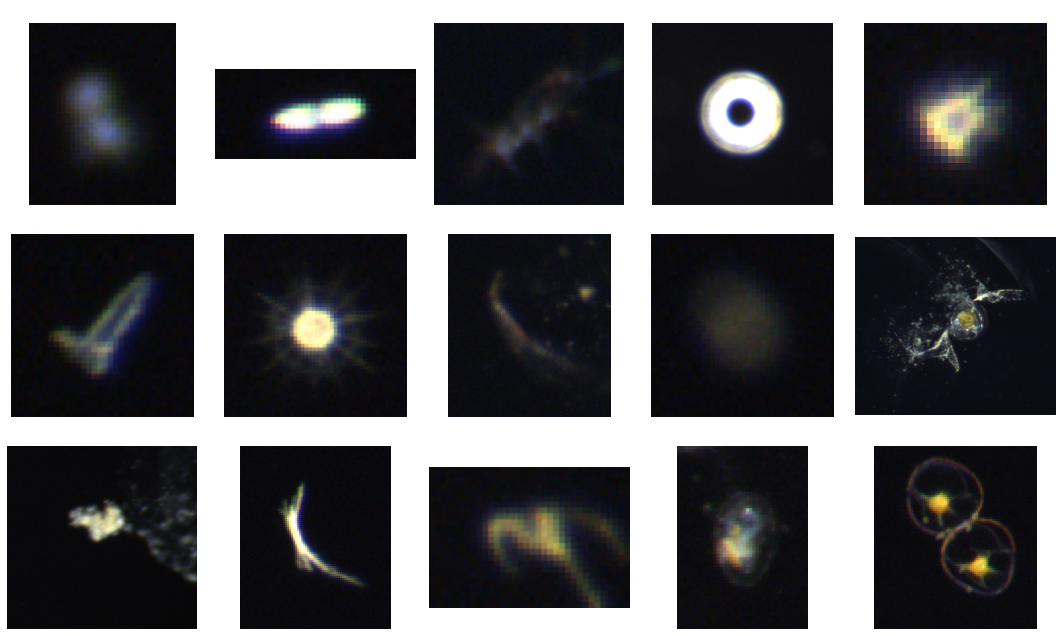

In [12]:
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(15,9))
dataloader = datamodule.train_dataloader()

for i, batch in enumerate(dataloader):
    ax = axes.flatten()[i]
    example_input, label = batch
    example_input = example_input.cpu().numpy()
    ax.imshow(np.moveaxis(example_input[0], 0, -1))
    ax.grid(False)
    ax.set_axis_off()
    ax.set_title(label[-1][0], color="white")

plt.tight_layout()
plt.savefig("example_images_raw.png", dpi=600, transparent=True)

In [5]:
pl.seed_everything(7)
np.random.seed(7)
cfg = hydra.compose(config_name="config", overrides=["+experiment=plankton/klas_supervised", "datamodule.batch_size=1", "datamodule.subsample_supervised=1", "datamodule.shuffle_train_dataset=false", "strategy=SingleDevice"])

train_transforms = hydra.utils.instantiate(cfg.datamodule.train_transforms)
valid_transforms = hydra.utils.instantiate(cfg.datamodule.valid_transforms)

datamodule = hydra.utils.instantiate(
    cfg.datamodule,
    train_transforms=train_transforms,
    valid_transforms=valid_transforms,
    dataset=cfg.datamodule.dataset,
    is_ddp=False,
)
datamodule.setup()

Global seed set to 7
111it [00:00, 10963.82it/s]                                                                           | 0/21 [00:00<?, ?it/s]
6480it [00:00, 13512.62it/s]
127it [00:00, 11084.96it/s]▉                                                                  | 2/21 [00:00<00:04,  4.05it/s]
143it [00:00, 11291.78it/s]
137it [00:00, 11273.02it/s]
412it [00:00, 12621.91it/s]
18it [00:00, 6074.79it/s]
226it [00:00, 11912.19it/s]
0it [00:00, ?it/s]8%|███████████████████████████▊                                             | 8/21 [00:00<00:00, 16.50it/s]
85it [00:00, 9510.64it/s]
1736it [00:00, 18766.32it/s]
552it [00:00, 23127.12it/s]
0it [00:00, ?it/s]7%|█████████████████████████████████████████▏                              | 12/21 [00:00<00:00, 20.49it/s]
80it [00:00, 8958.12it/s]
1844it [00:00, 19927.03it/s]
297it [00:00, 12342.30it/s]
723it [00:00, 13743.71it/s]████████████████████████████████████████████████▊                 | 16/21 [00:00<00:00, 23.32it/s]
178999it [00:14,

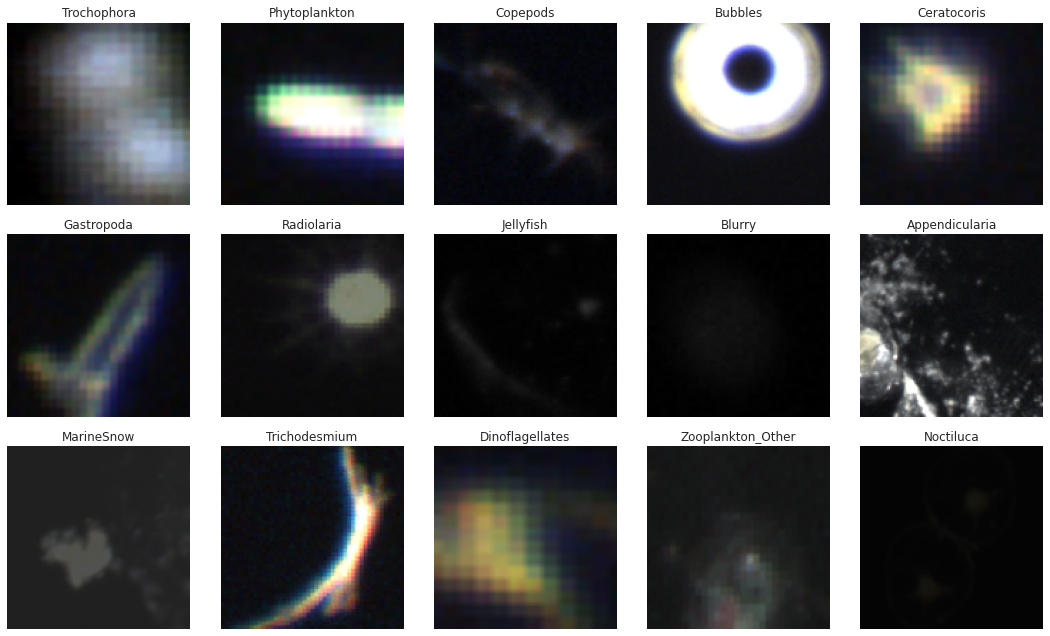

In [6]:
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(15,9))
dataloader = datamodule.train_dataloader()

for i, batch in enumerate(dataloader):
    ax = axes.flatten()[i]
    example_input, label = batch
    example_input = example_input.cpu().numpy()
    ax.imshow(np.moveaxis(example_input[0], 0, -1))
    ax.grid(False)
    ax.set_axis_off()
    ax.set_title(label[-1][0])

plt.tight_layout()
plt.savefig("example_images_transformed.png", dpi=600, transparent=True)

In [13]:
pl.seed_everything(99)
np.random.seed(99)
cfg = hydra.compose(config_name="config", overrides=["+experiment=plankton/klas_supervised", "datamodule.batch_size=1", "datamodule.subsample_supervised=1", "datamodule.shuffle_train_dataset=false", "strategy=SingleDevice", "datamodule/train_transforms=simclr_plankton", "random_seed=99"])

train_transforms = hydra.utils.instantiate(cfg.datamodule.train_transforms)
valid_transforms = hydra.utils.instantiate(cfg.datamodule.valid_transforms)

datamodule = hydra.utils.instantiate(
    cfg.datamodule,
    train_transforms=train_transforms,
    valid_transforms=valid_transforms,
    dataset=cfg.datamodule.dataset,
    is_ddp=False,
)
datamodule.setup()

Global seed set to 99
111it [00:00, 6910.40it/s]                                                                            | 0/21 [00:00<?, ?it/s]
6480it [00:00, 10308.73it/s]
127it [00:00, 11667.94it/s]▉                                                                  | 2/21 [00:00<00:06,  3.08it/s]
143it [00:00, 11994.75it/s]
137it [00:00, 11844.90it/s]
412it [00:00, 13305.92it/s]
18it [00:00, 6293.55it/s]
226it [00:00, 12513.04it/s]
0it [00:00, ?it/s]
85it [00:00, 9654.09it/s]
1736it [00:00, 19039.74it/s]███████████████████████████▎                                     | 10/21 [00:00<00:00, 16.65it/s]
552it [00:00, 23329.39it/s]
0it [00:00, ?it/s]
80it [00:00, 9183.18it/s]
1844it [00:00, 20649.85it/s]
297it [00:00, 12492.81it/s]█████████████████████████████████████████████▍                    | 15/21 [00:00<00:00, 18.72it/s]
723it [00:00, 14148.59it/s]
178999it [00:14, 12581.18it/s]██████████████████████████████████████████▍                    | 15/21 [00:14<00:00, 18.72it/s]
INFO:s

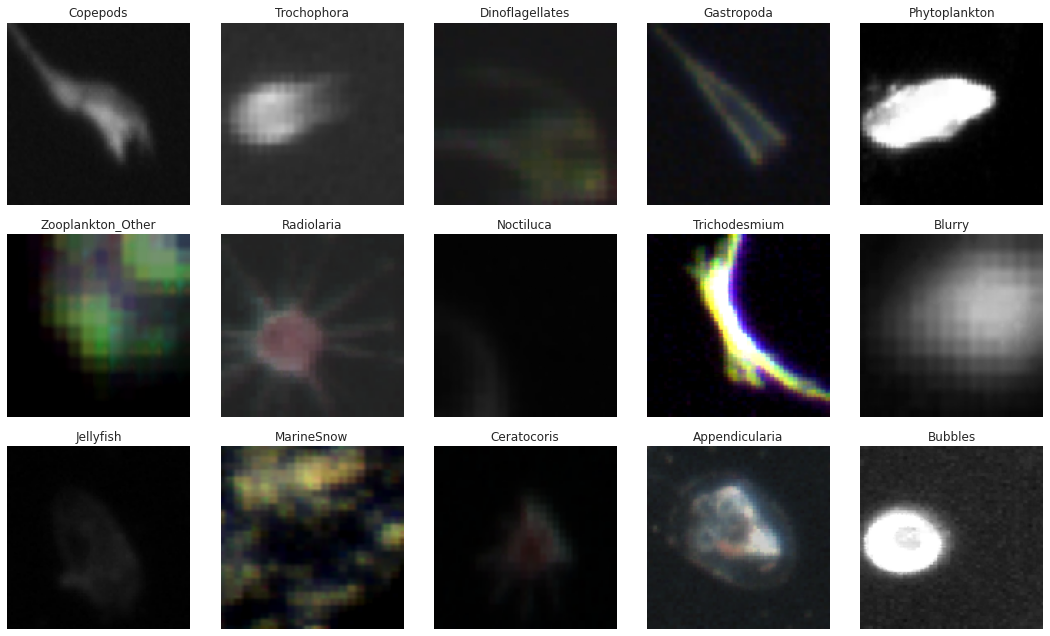

In [14]:
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(15,9))
dataloader = datamodule.train_dataloader()

for i, batch in enumerate(dataloader):
    ax = axes.flatten()[i]
    example_input, label = batch
    example_input = example_input.cpu().numpy()
    ax.imshow(np.moveaxis(example_input[0], 0, -1))
    ax.grid(False)
    ax.set_axis_off()
    ax.set_title(label[-1][0])

plt.tight_layout()
plt.savefig("example_images_transformed_2.png", dpi=600, transparent=True)